# Text Splitter

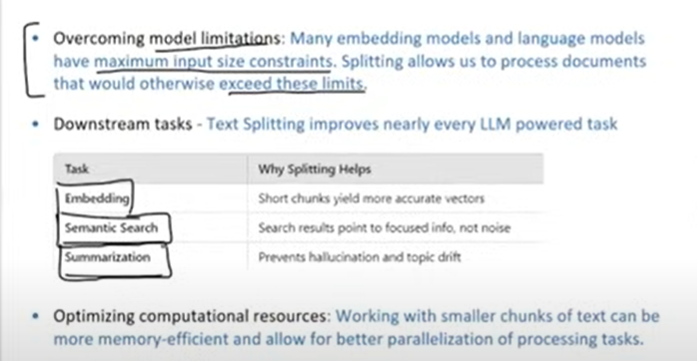
- OVercoming model limitation = kch models me liit hoti hy like 1k tokens or ar hamara text is sy ziada hy tw obv msla hoga tw we will split it into chunks of pags or paragraph 
- Downstream tasks : llm acha prform bhi krna hy on chunks 
- embadding = agr 1k words ko kch digits pr embade krain tw itna acha resultnhi ayega ofc , so we will split it into chunks and mak embadding of each chunk... 
- sematic search me faida hota hylike easy to search
- summarization = faltu info nhi hoti sumarization me

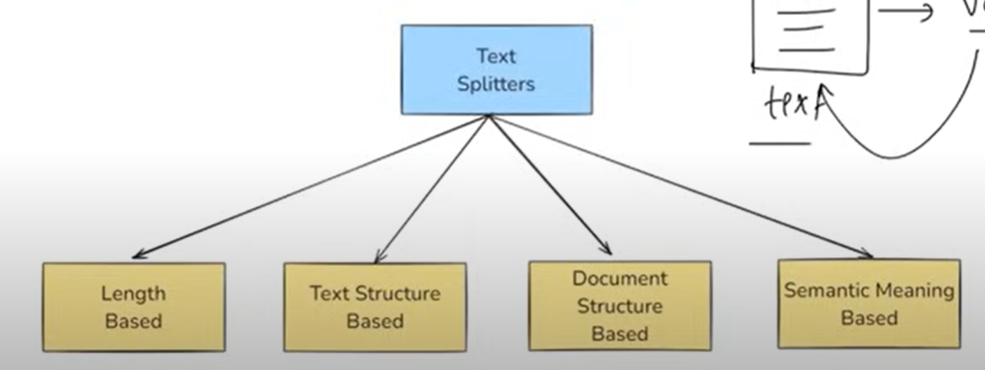

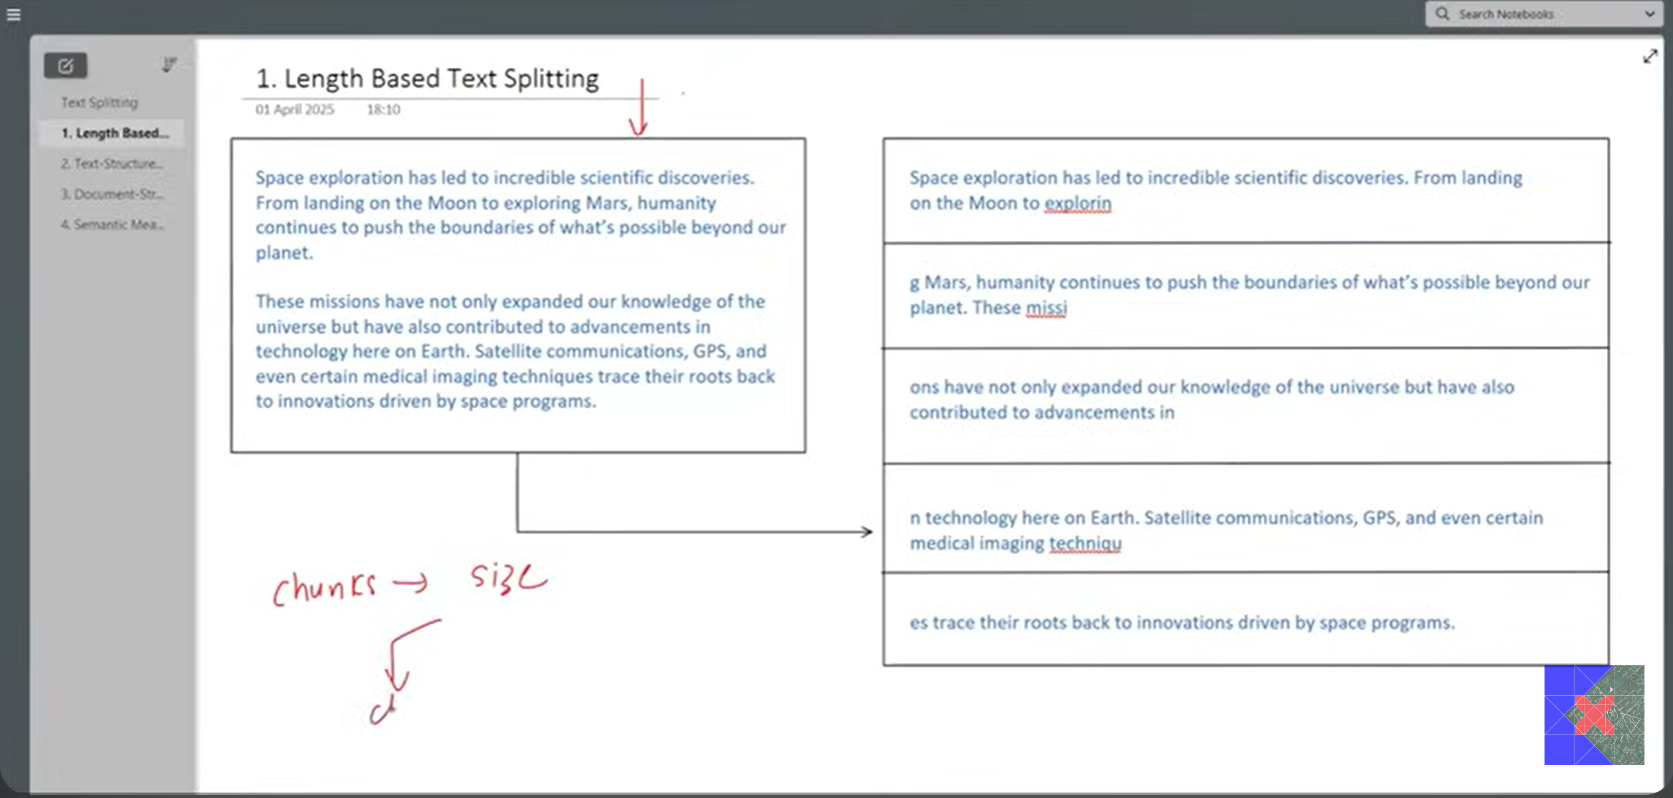

- ye na grammer dekhta hy na paragraph na word jaha apke btae hoe character pore hongye wahi se chunk bna dega

In [1]:
from langchain.text_splitter import CharacterTextSplitter

In [2]:
text = """because prison is safer than a city of fire and one prison guard in the night is better than a truckload of men who look like your father no one could take it no one could stomach it 
no one skin would be tough enough  the go home blacks refugees dirty immigrants asylum seekers sucking our country dry niggers with their hands out 
they smell strange savage messed up their country and now they want to mess ours up how do the words the dirty looks roll off your backs maybe because the blow is softer 

"""

In [15]:
splitter = CharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 0,  # 2 chunk ke beech me kitna over lap ho let agr hum 5 dete tw first chunk ke last 5 , 2nd hcunk ke start 5 hongye and so on
    separator= ""
    
)
result = splitter.split_text(text)
print(len(result),result)
print(len(result[0]))

6 ['because prison is safer than a city of fire and one prison guard in the night is better than a truck', 'load of men who look like your father no one could take it no one could stomach it \nno one skin woul', 'd be tough enough  the go home blacks refugees dirty immigrants asylum seekers sucking our country d', 'ry niggers with their hands out \nthey smell strange savage messed up their country and now they want', 'to mess ours up how do the words the dirty looks roll off your backs maybe because the blow is soft', 'er']
100


### Document loader and text splitter 

In [9]:
from langchain.document_loaders import PyPDFLoader,DirectoryLoader
loader = DirectoryLoader(
    path= "books",
    glob="pdf_file.pdf",
    loader_cls=PyPDFLoader
)
docs = loader.load()

In [12]:
split_docs = splitter.split_documents(docs)  # docusmnt obj ko separte krta hy 

In [ ]:
print(len(split_docs))  # 26 chunks bngye hain

26


# Text Splitter:


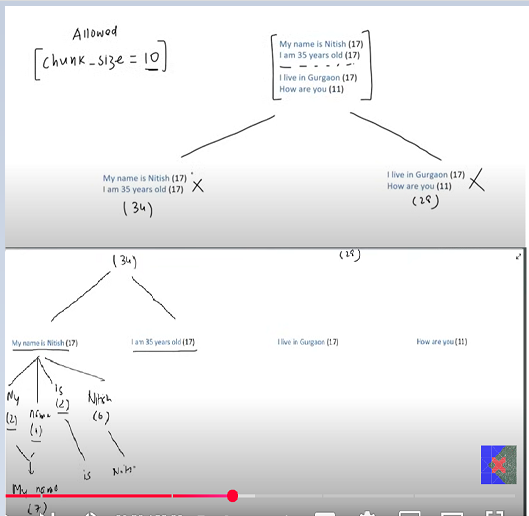


- pehle pararaph pr phr line phr word pr characters
- \n \n for para   , for line \n and so on
- jese sb s pehla chunk bna my name is (10 charcters ka ) dosra bna nitiesh 

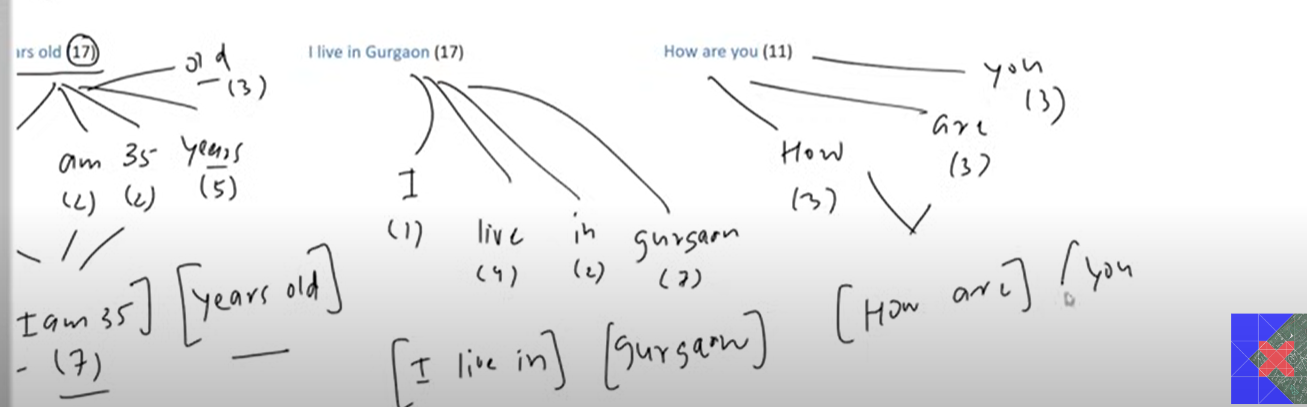

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
splitter  =  RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=0
)
docs  = splitter.split_text(text)
print(docs) # adhe adhe words nhi hain  

['because prison is safer than a city of fire and one prison guard in the night is better than a', 'truckload of men who look like your father no one could take it no one could stomach it', 'no one skin would be tough enough  the go home blacks refugees dirty immigrants asylum seekers', 'sucking our country dry niggers with their hands out', 'they smell strange savage messed up their country and now they want to mess ours up how do the', 'words the dirty looks roll off your backs maybe because the blow is softer']


- But agr alag type ka text ho like code ho tw usko words pr krna is not a sensibl thing tw hum text splitter use krte hain 

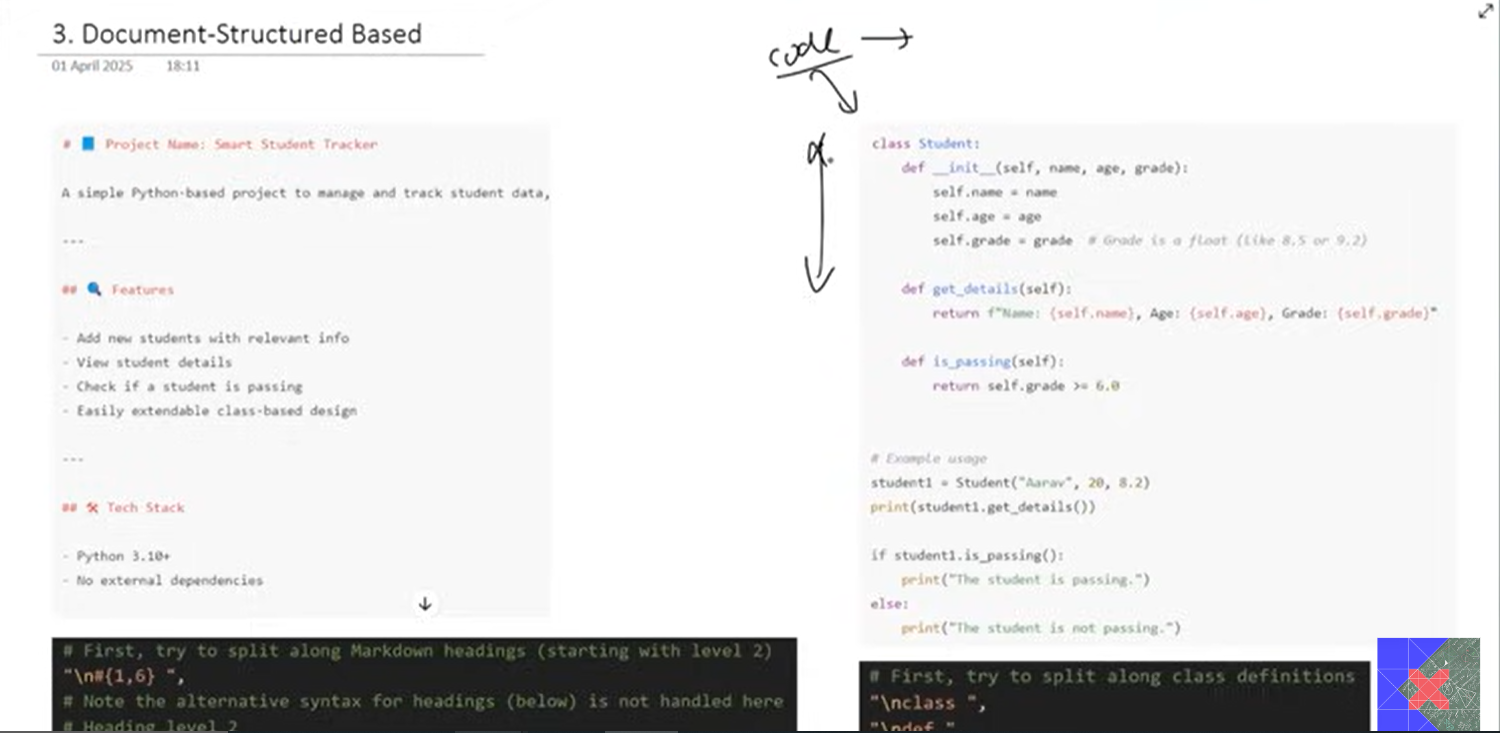
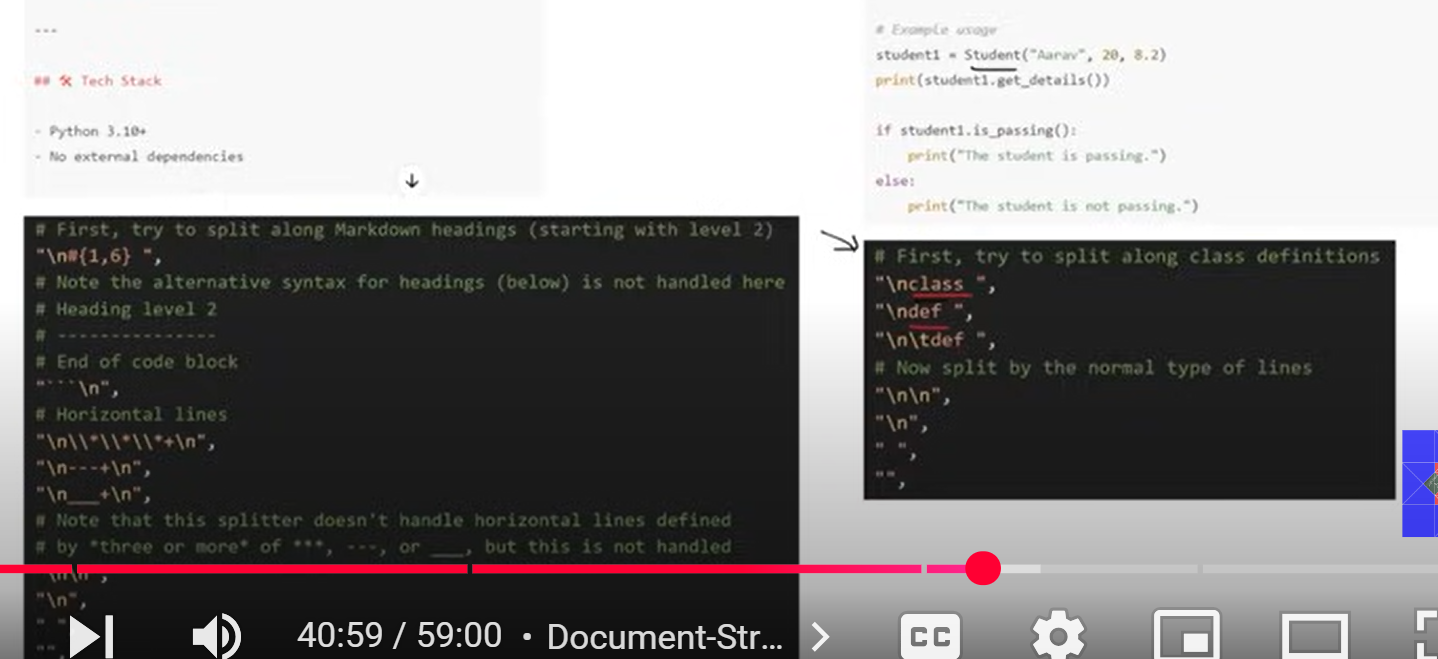

- class pr split def pr etc 
- Markdown bhi hoti hy like listing hoe wi ho etc jese resume me hoti 

In [32]:
from langchain.text_splitter import RecursiveCharacterTextSplitter,Language
splitter  =  RecursiveCharacterTextSplitter.from_language(
    # chunk_size=300,
    chunk_overlap=0,
    language= Language.PYTHON
)

text = """
class Person:
    def __init__(self, name, age):
        self._name = name      # Protected variable
        self._age = age        # Protected variable
    def get_age(self):
        return self._age
    def set_age(self, new_age):
        if new_age >= 0:
            self._age = new_age
        else:
            print("Invalid age!")
p = Person("Alice", 25)
print("Age:", p.get_age())
p.set_age(30)


    """
docs  = splitter.split_text(text)
print(docs) # adhe adhe words nhi hain  

['class Person:\n    def __init__(self, name, age):\n        self._name = name      # Protected variable\n        self._age = age        # Protected variable\n    def get_age(self):\n        return self._age\n    def set_age(self, new_age):\n        if new_age >= 0:\n            self._age = new_age\n        else:\n            print("Invalid age!")\np = Person("Alice", 25)\nprint("Age:", p.get_age())\np.set_age(30)']


In [33]:
for i in docs:
    print(i)

class Person:
    def __init__(self, name, age):
        self._name = name      # Protected variable
        self._age = age        # Protected variable
    def get_age(self):
        return self._age
    def set_age(self, new_age):
        if new_age >= 0:
            self._age = new_age
        else:
            print("Invalid age!")
p = Person("Alice", 25)
print("Age:", p.get_age())
p.set_age(30)


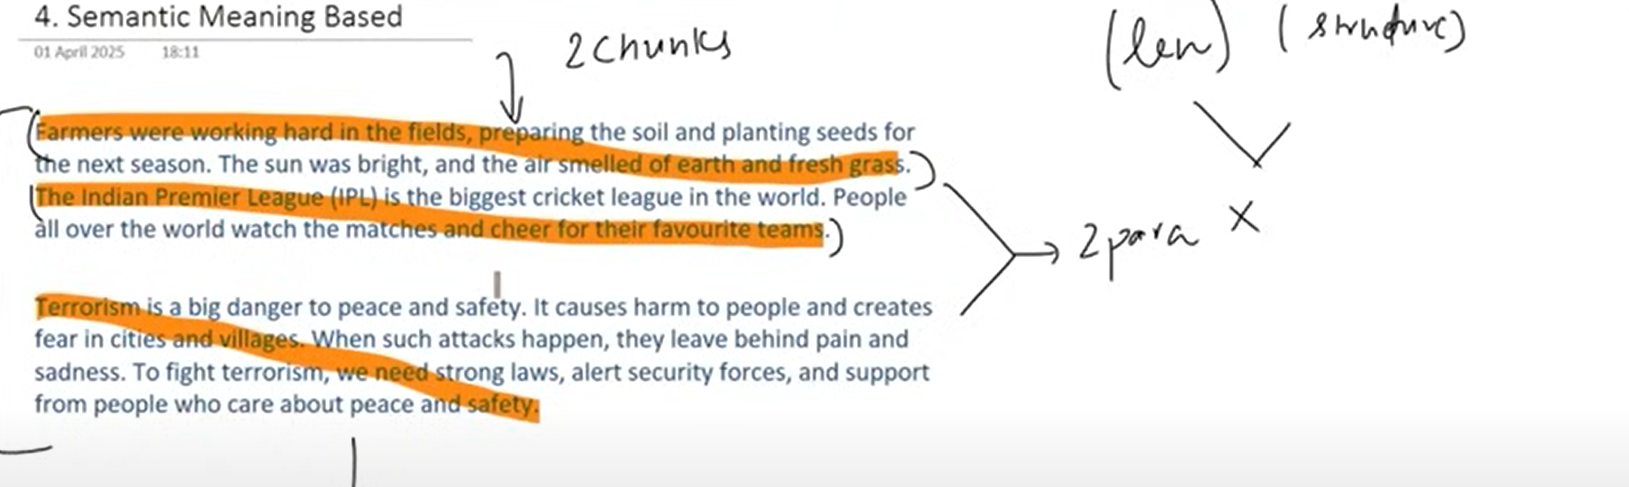
- kabhi kabhi dono splitter result nhi de pate na text splitter na recurrsive text splitter 
tw hum ye use krte semantic text splittr
- length ya structure ke base pr nhi blke meaining ke base pr krte jese uper wle paragraphs me 3 para hain but 2 diye hoe 

- HOw it works :
    - basiclly ya pehle har sentence ki embadding geenrate krta vector bna deta or har consecetive vector ki similarity check krta like 1,2 ki 2,3 ki 3,4 ki jab similarity score kam hota hy tw ye wahi pr usko break kr deta hy like new para start ho rha

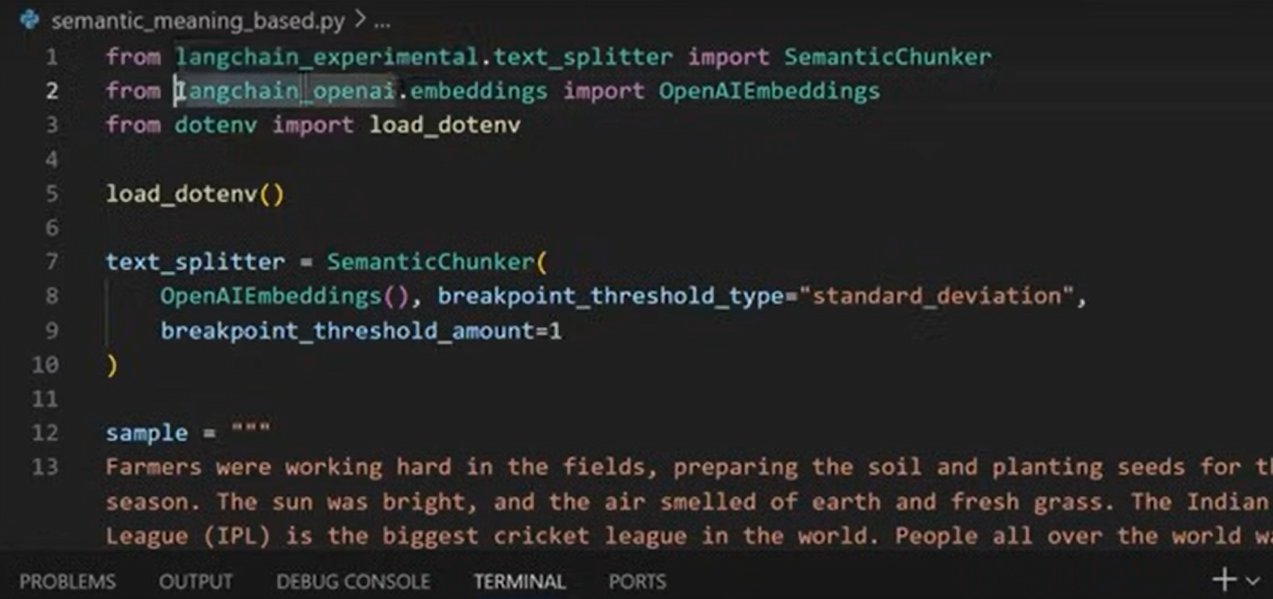

- ase use krte hai but ye abhi experiment me hy itna acha accurate result nhi deta